In [1]:
import sys
sys.path.insert(0, '../../../../above/gitlab_repos/PhoREAL/source_code')

from icesatReader import get_atl03_struct
from icesatReader import get_atl08_struct
from icesatPlot import getPlot

affected functions: ['writeLas', 'writeHeaderFile']
affected functions: ['writeKml']


In [2]:
# As a place holder..

atl03filepath = '/projects/jabba/data/bbox_nsib1/ATL03_20190615091900_11930305_002_01.h5'
atl08filepath = '/projects/jabba/data/bbox_nsib1/ATL08_20190615091900_11930305_002_01.h5'

# And specifying a groundtrack
gt = 'gt1r'

In [3]:
# Read in the ATL03 Struct
'''
Inputs: the ATL03 file path, the groundtrack, and an associated ATL08 File Path (for photon-level classifications)
Output: An ATL03 Struct, with an associated pandas DF
'''
atl03 = get_atl03_struct(atl03filepath, gt, atl08filepath)

# Read in ATL08 Struct
'''
Inputs: The ATL08 File Path, a groundtrack, and the ATL03 struct (to match boundaries and extents)
Output: An ATL08 struct, with an associated pandas DF
'''
atl08 = get_atl08_struct(atl08filepath, gt, atl03)

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed

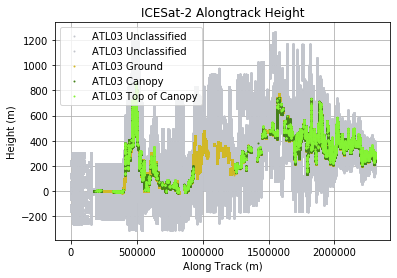

In [5]:
'''
getPlot(xData, yData, xLabel, yLabel, title, outPath, origTitle, filterType = [], filterData = [], filterNum = [])
xData: n-sized array on the x-axis
yData: n-sized array on the y-axis
xLabel: Label for the x-axis
yLabel: Label for the y-axis
Title: Title for top of plot
outPath: Left blank, i.e.([])
origTitle: Left blank, i.e.([])
filterType: For symbolizatoin, either 'class' for classification or 'signal_conf' for signal confidence
filterData: n-sized array for either the classification or the signal confidence
filterNum: Class numbers to include (e.g.,[-1,0,1,2,3] for all classificatoins)
...-1 unclassified, noise
....0 unclassified, noise
....1 ground
....2 canopy
....3 high canopy


'''

%matplotlib inline 

getPlot(atl03.df.alongtrack, atl03.df.h_ph, 'Along Track (m)', 'Height (m)','ICESat-2 Alongtrack Height',[],[],
        filterType = 'class',filterData = atl03.df.classification,filterNum = [-1,0,1,2,3])